In [20]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [21]:
# Import the pandas library and read the breast cancer data from a CSV file.
df = pd.read_csv("D:/coders cave/breast_cancer.csv",header = 0)
# Display the first 5 rows of the DataFrame.
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
#data cleaning- remove unwanted attributes
columns_to_remove = ['id','Unnamed: 32']
df = df.drop(columns=columns_to_remove, axis=1)

In [23]:
# Check for NaN values in the DataFrame
nan_count = df.isna().sum()

In [5]:
nan_count

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder

# Example categorical data
categorical_data = df['diagnosis']

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the categorical data
diagnosis = encoder.fit_transform(categorical_data)
df['output']=diagnosis

In [7]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,output
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [8]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'output'],
      dtype='object')

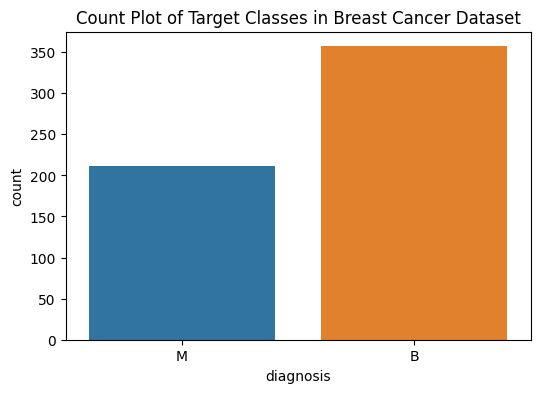

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# Count plot of target classes
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diagnosis')
plt.title('Count Plot of Target Classes in Breast Cancer Dataset')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14252\214097132.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=False, cmap='coolwarm')


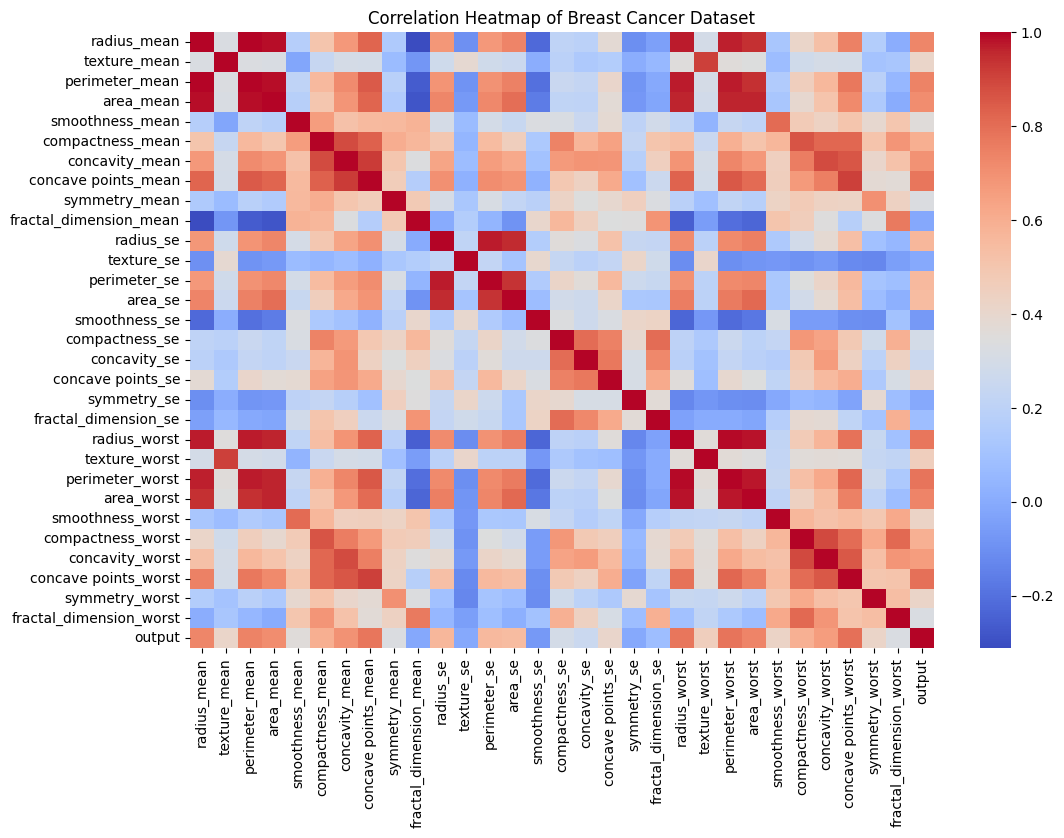

In [26]:
# Correlation plot
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Breast Cancer Dataset')
plt.show()

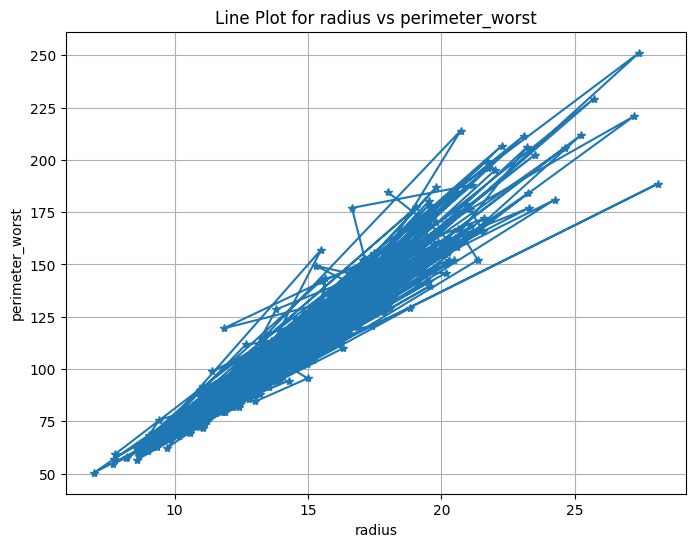

In [30]:
# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(df['radius_mean'], df['perimeter_worst'], marker='*')
plt.title('Line Plot for radius vs perimeter_worst')
plt.xlabel('radius')
plt.ylabel('perimeter_worst')
plt.grid(True)
plt.show()

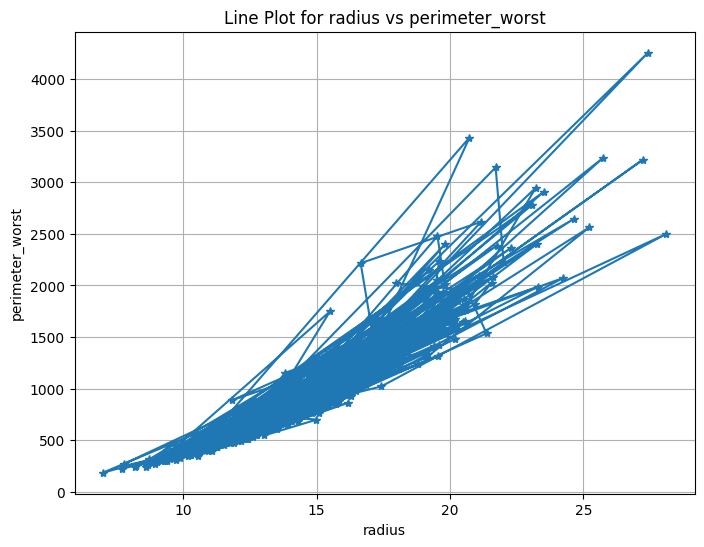

In [31]:
# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(df['radius_mean'], df['area_worst'], marker='*')
plt.title('Line Plot for radius vs perimeter_worst')
plt.xlabel('radius')
plt.ylabel('perimeter_worst')
plt.grid(True)
plt.show()

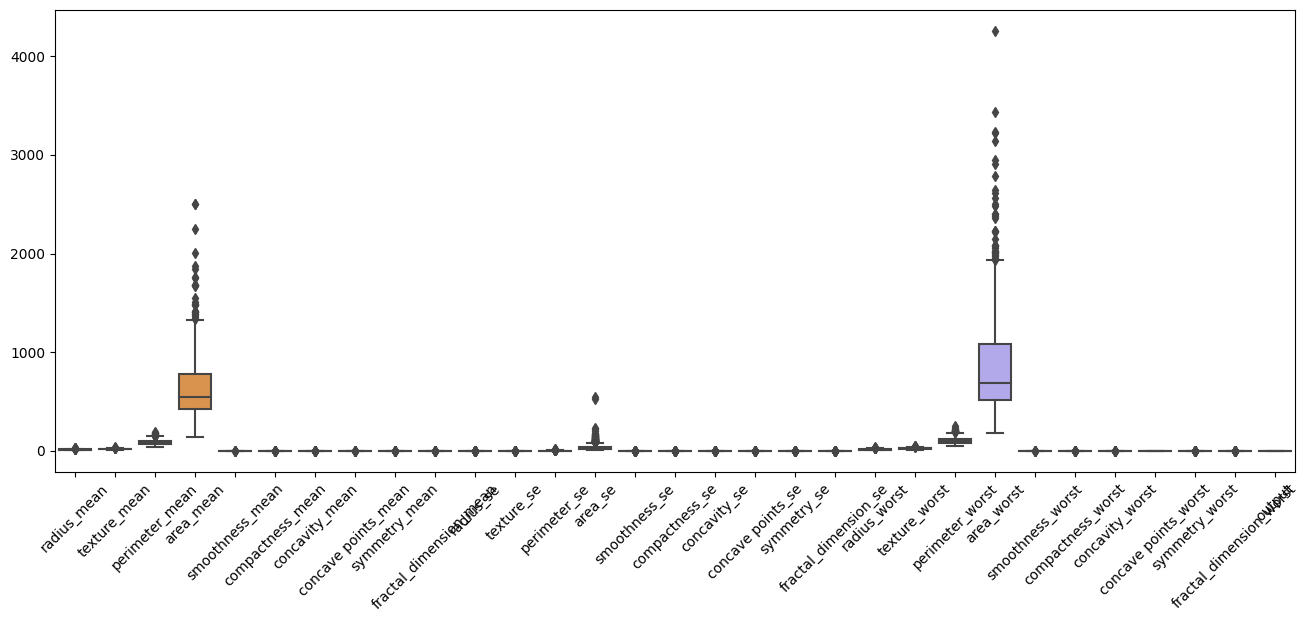

In [33]:
# Box plots for individual features
plt.figure(figsize=(16, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [9]:
# Remove the 'diagnosis' column from the DataFrame as its encoded
df = df.drop(columns=['diagnosis'])

In [10]:
df.shape

(569, 31)

In [11]:
#remove outliers
# Calculate the z-scores for each value
z_scores = np.abs((df - df.mean()) / df.std())

# Define a threshold for identifying outliers (e.g., z-score greater than 3)
threshold = 3

# Identify and filter out outliers
filtered_data = df[z_scores < threshold].dropna()

# Display the DataFrame with outliers removed
print(filtered_data)


     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
4          20.29         14.34          135.10     1297.0          0.10030   
5          12.45         15.70           82.57      477.1          0.12780   
6          18.25         19.98          119.60     1040.0          0.09463   
..           ...           ...             ...        ...              ...   
560        14.05         27.15           91.38      600.4          0.09929   
563        20.92         25.09          143.00     1347.0          0.10990   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   

     compactness_mean  concavity_mean  concave points_mean  sym

In [12]:
#standardize values in range 0-1
scaler = StandardScaler()

#Fit and transform the scaler on the DataFrame
scaled_features = scaler.fit_transform(filtered_data)

 #Create a new DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_features, columns=filtered_data.columns)

In [13]:
df1=filtered_data

In [14]:
X = df1.drop(columns=['output'])  
y = df1['output'] 

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,0.05742,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [18]:
X_test.shape

(99, 30)

In [19]:
# Create a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

In [20]:
# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9797979797979798
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        61
           1       1.00      0.95      0.97        38

    accuracy                           0.98        99
   macro avg       0.98      0.97      0.98        99
weighted avg       0.98      0.98      0.98        99



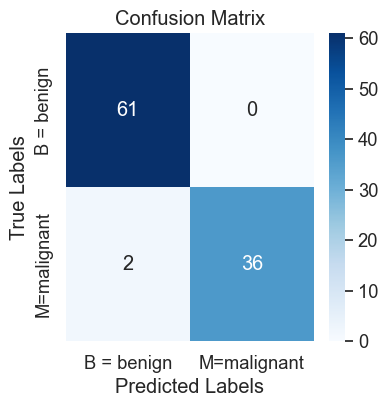

In [21]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test,y_pred)

# Define class labels
class_labels = ["B = benign", "M=malignant"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4,4))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [22]:
from sklearn.tree import DecisionTreeClassifier
clfdt = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training data
clfdt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clfdt.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9595959595959596


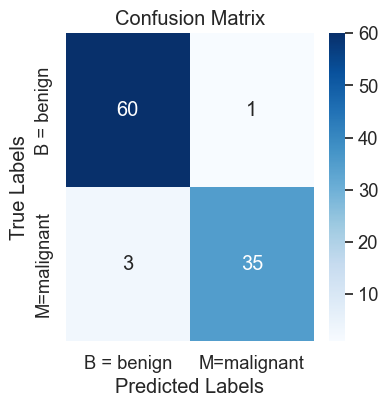

In [23]:

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test,y_pred)

# Define class labels
class_labels = ["B = benign", "M=malignant"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(4,4))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [24]:
# Calculate accuracy and print classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9595959595959596
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        61
           1       0.97      0.92      0.95        38

    accuracy                           0.96        99
   macro avg       0.96      0.95      0.96        99
weighted avg       0.96      0.96      0.96        99



The accuracy of Random forest is more than decision tree so we can use use random forest algorithm to train the model 

In [26]:
#testing by giving random data to classify and check if predicted output matches test output
clf.predict(X_test)


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [27]:
np.array(y_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])